# <center><font color = 'blue'>*ADRIS MISRA*</font></center>

**Github repository:** https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-adris-misra

# `Project -  Twitter US Airline Sentiment`

### `Objective:`
Classification of sentiments from Tweet data about major US airlines

### `Domain:` 
- Aviation

### `Learning Outcomes:`
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Evaluate the Model.

### `Data Description:`

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kaggle website.
- The dataset has the following columns:
	- tweet_id
	- airline_sentiment
	- airline_sentiment_confidence
	- negativereason
	- negativereason_confidence
	- airline
	- airline_sentiment_gold
	- name
	- negativereason_gold
	- retweet_count
	- text
	- tweet_coord
	- tweet_created
	- tweet_location
	- user_timezone

### Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)<br>
    a. Drop all other columns except “text” and “airline_sentiment”.<br>
    b. Check the shape of data.<br>
    c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)<br>
    a. Html tag removal.<br>
    b. Tokenization.<br>
    c. Remove the numbers.<br>
    d. Removal of Special Characters and Punctuations.<br>
    e. Conversion to lowercase.<br>
    f. Lemmatize or stemming.<br>
    g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)<br>
    h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)<br>
    a. Use CountVectorizer.<br>
    b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [40]:
# Import warnings to suppress runtime warnings

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Import basic libraries for data and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [42]:
# Import Text and NLP Libraries

import re
import unicodedata
from bs4 import BeautifulSoup
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import contractions
import emoji


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

In [426]:
# Import models and relevent class / functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.metrics import classification_report, accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [44]:
# Import data

tweet = pd.read_csv("Tweets.csv")

In [45]:
# checking sample head data

tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [46]:
# checking sample tail data

tweet.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [47]:
# shape of dataframe

tweet.shape

(14640, 15)

In [48]:
# check info

tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [49]:
# Check for Missing Values

tweet.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [50]:
tweet.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [51]:
tweet[tweet.duplicated(keep=False)]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
11898,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
11902,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11905,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
11907,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,570275010759102466,negative,1.0,Lost Luggage,1.0,American,NaN,paintbranch1398,NaN,0,@AmericanAir this delayed bag was for my frien...,NaN,2015-02-24 09:32:12 -0800,NaN,NaN
12157,570273819287531520,positive,1.0,NaN,NaN,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up ...,NaN,2015-02-24 09:27:28 -0800,East Coast CT.,Central Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)


<font color='green'>**Preliminary data analysis:** 
- There are 14640 rows and 15 columns in the dataset
- There are missing values but our fields of interest doesn't have missing values
- There are duplicates rows also that needs duplicate treatment
- There are several columns with NAN values but those are not of our interest
</font>

### 2. Additional Analysis: Study the data distribution in target variable and taking care of data issues

In [52]:
# Number of unique in each column

tweet.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [53]:
# drop all unwanted columns before duplicate treatment

tweet = tweet[['tweet_id','airline_sentiment','text']]

In [54]:
tweet

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,569587686496825344,positive,@AmericanAir thank you we got on a different f...
14636,569587371693355008,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,569587242672398336,neutral,@AmericanAir Please bring American Airlines to...
14638,569587188687634433,negative,"@AmericanAir you have my money, you change my ..."


In [55]:
# Deleteing duplicates

tweet.drop_duplicates(keep='first', inplace=True)

In [56]:
tweet.shape

(14503, 3)

In [57]:
# seperate out tweet id

tweet_id = tweet['tweet_id']

tweet.drop(columns='tweet_id', inplace=True)

In [58]:
tweet

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [59]:
# checking distribution of sentiment


df=pd.concat([tweet['airline_sentiment'].value_counts(),tweet['airline_sentiment'].value_counts(normalize=True)*100],axis=1)
df=df.reset_index()
df.columns=['airline_sentiment','count','frequency%']
print(df)

  airline_sentiment  count  frequency%
0          negative   9089   62.669792
1           neutral   3074   21.195615
2          positive   2340   16.134593


### 3. Text pre-processing

In [60]:
# Visualize text data for better understanding

pd.set_option("display.max_colwidth",110)

print(tweet['text'].head(25))
print('')
print('')
print('')
print(tweet['text'].tail(25))

pd.set_option("display.max_colwidth",50)

0                                                                               @VirginAmerica What @dhepburn said.
1                                          @VirginAmerica plus you've added commercials to the experience... tacky.
2                                           @VirginAmerica I didn't today... Must mean I need to take another trip!
3     @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they ...
4                                                           @VirginAmerica and it's a really big bad thing about it
5     @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the ...
6                                   @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
7      @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
8                                                                   @vir

In [61]:
# Spacy Initiation

nlp = spacy.load('en_core_web_sm')

In [63]:
print(nlp.Defaults.stop_words)

{'’ve', 'together', 'may', 'very', 'that', 'ourselves', 'thru', 'two', 'less', 'must', 'more', 'these', 'only', 'along', 'also', 'mine', 'whether', 'after', 'already', "'m", 'from', "'d", 'ever', 'when', 'keep', 'how', 'many', "'s", 'where', 'once', 'her', 'beyond', 'really', 'his', '‘s', 'serious', 'six', 'she', 'please', '’d', 'down', 'below', 'been', '‘d', 'either', 'back', '‘m', "'ve", 'anyone', 'does', 'nowhere', 'were', 'which', 'behind', 'go', 'us', 'might', 'sixty', 'quite', 'while', 'except', 'our', 'me', 'into', 'what', 'hereafter', 'full', 'than', 'moreover', 'each', 'nine', 'seems', 'am', 'becomes', 'amongst', 'too', 'since', 'thereby', 'whither', 'under', 'being', 'should', 'besides', 'regarding', 'doing', 'twenty', 'put', 'somewhere', 'up', 'fifty', 'fifteen', 'show', 'whereupon', '‘ve', 'during', 'everyone', 'had', 'became', "'ll", 'own', 'just', 'made', 'becoming', 'you', 'other', 'further', 'yourselves', 'for', 'i', 'itself', 'yourself', 'there', 'whose', 'rather', 'th

In [66]:
# Removing negative sentiment words this being a sentiment classification

nlp.Defaults.stop_words -= {'cannot', 'never','no','not'}

In [67]:
# Adding some common words that may not be relevent to sentiment

nlp.Defaults.stop_words |= {'airline','airlines','america','american','aa'}

In [68]:
# text for function testing

txt = """<div>
<h1>Title</h1>
<p>A long text........ </p>
<a href=""> a link </a>
</div>.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice! @ABC @HBO123 @145 @sky_fly at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can't take it any more.
.קום (the .COM equivalent in Hebrew)
❤️👍👌 :-):):-D:D:-(:(:-C:C:-D
http://abcde.com go to this.
Or Go to https://xyzasdf/bcg.org
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.
"""

In [69]:
# Capture Emoji Sentiments

def capture_emoji(text):
    """Converts emojis to text and capture the emoji sentiment.
    Input: Text, return text"""
    
    pattern_happy = r'(:-\)|:\)|:-D|:D)'
    pattern_sad = r'(:-\(|:\(|:-C|:C)'
    
    text = re.sub(pattern_happy, ' happy_face ', text)
    text = re.sub(pattern_sad, ' sad_face ', text)
    
    text= emoji.demojize(text)
    
    
    return text


# Test Function

txt = capture_emoji(txt)

print(txt)

<div>
<h1>Title</h1>
<p>A long text........ </p>
<a href=""> a link </a>
</div>.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice! @ABC @HBO123 @145 @sky_fly at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can't take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
http://abcde.com go to this.
Or Go to https://xyzasdf/bcg.org
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [70]:
# HTML Tag removal

def remove_html_tag(text):
    """Remove HTML tags from text.
    Input: Text, Retun: Text"""
    bs = BeautifulSoup(text, "html.parser")
    text = bs.get_text()
    return text


# test function

txt = remove_html_tag(txt)

print(txt)


Title
A long text........ 
 a link 
.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice! @ABC @HBO123 @145 @sky_fly at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can't take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
http://abcde.com go to this.
Or Go to https://xyzasdf/bcg.org
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [71]:
# Remove URLs as that doesn't carry any sentiment

def remove_url(text):
    """Regex \w+:\/\/\S+ matches all the URLs starting with http:// or https:// and replacing it with space."""
    
    pattern = r'(\w+:\/\/\S+)'
    text = re.sub(pattern, ' ', text)
    return text

# test funtion

txt = remove_url(txt)

print(txt)
    


Title
A long text........ 
 a link 
.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice! @ABC @HBO123 @145 @sky_fly at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can't take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
  go to this.
Or Go to  
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [72]:
# Replace contractions in string of text

def replace_contractions(text):
    """Replace contractions in string of text.
    Input: Text, Return: Text"""
    text = contractions.fix(text)
    return text

# Test Function

txt = replace_contractions(txt)

print(txt)


Title
A long text........ 
 a link 
.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice! @ABC @HBO123 @145 @sky_fly at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can not take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
  go to this.
Or Go to  
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [73]:
# Remove Twiteer handle
# Twitter handles being very common in tweet data, but it doesn't carry any sentiment

def remove_twitter_handle(text):
    """Function to remove Twitter handle.
     Input: Text, Retun: Text"""
    
    pattern = r'(@\w+\b)'
    text = re.sub(pattern, ' ', text)
    return text

# test funtion

txt = remove_twitter_handle(txt)

print(txt)


Title
A long text........ 
 a link 
.
I stay in 2525 Glen st. I use $15.99 daily.
The show was nice!         at 7:45 PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can not take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
  go to this.
Or Go to  
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [74]:
# remove numbers

def remove_numbers(text):
    """Funtion to remove numbers and digits.
    Input: Text, Retun: Text"""
    
    pattern = r'(\d*\.{1}\d+|\d+)'
    text = re.sub(pattern, '', text)
    return text

# test funtion

txt = remove_numbers(txt)

print(txt)


Title
A long text........ 
 a link 
.
I stay in  Glen st. I use $ daily.
The show was nice!         at : PM. What do you think? #greatshow
so come and enjoy tomorrow.
A letter has been written, asking him to be released.
I do not recommend him for the next project.
I can not take it any more.
.קום (the .COM equivalent in Hebrew)
:red_heart_selector::thumbs_up::OK_hand:  happy_face  happy_face  happy_face  happy_face  sad_face  sad_face  sad_face  sad_face  happy_face 
  go to this.
Or Go to  
I am getting five dollar from him.
I need to go to Paris in American Airlines from there I will catch Delta airline.



In [75]:
#remove new line, special characters and Punctuations

def remove_newline_special_characters(text):
    """Removes newline characters special characters and punctuations.
    Input: Text, Retun: Text"""
    
    newline = r'\n'
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(newline, ' ', text)  # remove newline
    text = re.sub(pattern, ' ', text)   # remove special character leaving alpha numeric and spaces
    text = re.sub(r'\s+', ' ', text)   # replace multiple space with a single space
    return text

# test funtion

txt = remove_newline_special_characters(txt)

print(txt)

 Title A long text a link I stay in Glen st I use daily The show was nice at PM What do you think greatshow so come and enjoy tomorrow A letter has been written asking him to be released I do not recommend him for the next project I can not take it any more the COM equivalent in Hebrew red_heart_selector thumbs_up OK_hand happy_face happy_face happy_face happy_face sad_face sad_face sad_face sad_face happy_face go to this Or Go to I am getting five dollar from him I need to go to Paris in American Airlines from there I will catch Delta airline 


In [76]:
# Conversion to lowercase

def convert_lower(text):
    """Converts text to lower case.
    Input: Text, Retun: Text"""
    
    text = text.lower().strip()   # converts to lower case and removes and leading or trailing spaces
    
    return text

# test funtion

txt = convert_lower(txt)

print(txt)

title a long text a link i stay in glen st i use daily the show was nice at pm what do you think greatshow so come and enjoy tomorrow a letter has been written asking him to be released i do not recommend him for the next project i can not take it any more the com equivalent in hebrew red_heart_selector thumbs_up ok_hand happy_face happy_face happy_face happy_face sad_face sad_face sad_face sad_face happy_face go to this or go to i am getting five dollar from him i need to go to paris in american airlines from there i will catch delta airline


In [77]:
# Tokenization and Lemmatization and remove stop words

def tokenize_lemmatize_remove_stopwords(text):
    """Performs Tokenization and Lemmatization and removing stop words using Spacy
    Input: Text, Retun: list of words"""
    
    token_list = []                  # for appending the words back to list
    pos_tag_list = ['DET','PRON','PROPN', 'NUM']    # List for filtering out determiner, pronoun, propernoun, numbers in text
    spacy_text = nlp(text)
    for token in spacy_text:
        if token.is_stop == False and token.pos_ not in pos_tag_list:   # Operates only on Non Stop Words & Filters Pos Tags
            txt = token.lemma_           # Lemmatization
            token_list.append(txt)
    
    return token_list


# test funtion

txt = tokenize_lemmatize_remove_stopwords(txt)

print(txt)

['title', 'long', 'text', 'link', 'stay', 'glen', 'st', 'use', 'daily', 'nice', 'pm', 'think', 'greatshow', 'come', 'enjoy', 'tomorrow', 'letter', 'write', 'ask', 'release', 'not', 'recommend', 'project', 'not', 'com', 'equivalent', 'hebrew', 'red_heart_selector', 'thumbs_up', 'ok_hand', 'happy_face', 'sad_face', 'sad_face', 'sad_face', 'sad_face', 'happy_face', 'get', 'dollar', 'need', 'paris', 'catch', 'delta']


In [78]:
# Joining words back to string

def join_words(word_list):
    """Takes list of words as input and joins them back to form sentence
    Input: List. Output: Text"""
    
    text = ' '.join(word_list)
        
    return text

# test funtion

txt = join_words(txt)

print(txt)

title long text link stay glen st use daily nice pm think greatshow come enjoy tomorrow letter write ask release not recommend project not com equivalent hebrew red_heart_selector thumbs_up ok_hand happy_face sad_face sad_face sad_face sad_face happy_face get dollar need paris catch delta


In [79]:
# main fuction for pre processing

def pre_process(text):
    """Main preprocessing function that calls all individual preprocessing functions.
    Input: List, Output: text"""
    
    text = capture_emoji(text)
    text = remove_html_tag(text)
    text = remove_url(text)
    text = replace_contractions(text)
    text = remove_twitter_handle(text)
    text = remove_numbers(text)
    text = remove_newline_special_characters(text)
    text = convert_lower(text)
    text = tokenize_lemmatize_remove_stopwords(text)
    text = join_words(text)
    
    return text



# test funtion

txt = pre_process(txt)

print(txt)

title long text link stay glen st use daily nice pm think greatshow come enjoy tomorrow letter write ask release not recommend project not com equivalent hebrew red_heart_selector thumbs_up ok_hand happy_face sad_face sad_face sad_face sad_face happy_face dollar need paris catch delta


In [81]:
#tweet.drop('clean_text', axis=1, inplace=True)

In [82]:
# Apply all pre processing steps to entire DataFrame and store clean data in another column

tweet['clean_text'] = tweet.apply(lambda row: pre_process(row['text']), axis=1)

In [83]:
# Encode Sentiments to numeric value

def encode_sentiment(text):
    """Take text sentiment values and returns numeric encoding
    1: positive
    0: neutral
    -1: negative
    Input: Text, Outpur: Int"""
    
    v_code = -999
    
    if text == 'neutral':
        v_code = 0
    elif text == 'positive':
        v_code = 1
    elif text == 'negative':
        v_code = -1
    else: 
        v_code = -999
    
    return v_code


tweet['sentiment_code'] = tweet.apply(lambda row: encode_sentiment(row['airline_sentiment']), axis=1)

In [84]:
# Print first 25 rows

tweet.head(25)

,airline_sentiment,text,clean_text,sentiment_code
0,neutral,@VirginAmerica What @dhepburn said.,say,0
1,positive,@VirginAmerica plus you've added commercials t...,plus add commercial experience tacky,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,not today mean need trip,0
3,negative,@VirginAmerica it's really aggressive to blast...,aggressive blast obnoxious entertainment guest...,-1
4,negative,@VirginAmerica and it's a really big bad thing...,big bad thing,-1
5,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously pay flight seat not playing bad thin...,-1
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly time fly vx ear worm not away happy...,1
7,neutral,@VirginAmerica Really missed a prime opportuni...,miss prime opportunity man hat parody,0
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",not happy_face,1
9,positive,"@VirginAmerica it was amazing, and arrived an ...",amazing arrive hour early good,1


In [85]:
# Visualize text data for better understanding

pd.set_option("display.max_colwidth",110)

print(tweet['clean_text'].head(25))
print('')
print('')
print('')
print(tweet['clean_text'].tail(25))

pd.set_option("display.max_colwidth",50)

0                                                                                            say
1                                                           plus add commercial experience tacky
2                                                                       not today mean need trip
3                            aggressive blast obnoxious entertainment guest face little recourse
4                                                                                  big bad thing
5                                            seriously pay flight seat not playing bad thing fly
6                                            yes nearly time fly vx ear worm not away happy_face
7                                                          miss prime opportunity man hat parody
8                                                                                 not happy_face
9                                                                 amazing arrive hour early good
10                            

In [86]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14503 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14503 non-null  object
 1   text               14503 non-null  object
 2   clean_text         14503 non-null  object
 3   sentiment_code     14503 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.5+ KB


### 4. Vectorization:

In [87]:
# Taking Labels out of dataframe and ensure it is int

labels = tweet['sentiment_code']
labels = labels.astype('int')

labels

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: sentiment_code, Length: 14503, dtype: int32

In [88]:
# Taking Text out of DataFrame

text = np.array(tweet['clean_text'])

text

array(['say', 'plus add commercial experience tacky',
       'not today mean need trip', ..., 'bring blackberry',
       'money change flight not answer phone suggestion commitment',
       'ppl need know seat flight plz standby people flight'],
      dtype=object)

In [89]:
# Split data into training and testing set keeping ratio same

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=7,stratify=labels)

In [90]:
y_train.value_counts()

-1    7271
 0    2459
 1    1872
Name: sentiment_code, dtype: int64

In [91]:
y_test.value_counts()

-1    1818
 0     615
 1     468
Name: sentiment_code, dtype: int64

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11602,)
(11602,)
(2901,)
(2901,)


In [93]:
# Count Vectorization 

vectorizer = CountVectorizer(max_features=500)           
X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)

In [94]:
vectorizer.get_feature_names()[:25]

['able',
 'access',
 'account',
 'actually',
 'add',
 'address',
 'agent',
 'ago',
 'air',
 'aircraft',
 'airplane_selector',
 'airport',
 'airway',
 'allow',
 'amazing',
 'answer',
 'apology',
 'app',
 'appreciate',
 'arrival',
 'arrive',
 'ask',
 'assistance',
 'atl',
 'atlanta']

In [95]:
X_train_vec.shape

(11602, 500)

In [96]:
# TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [97]:
vectorizer_tfidf.get_feature_names()[:25]

['able',
 'access',
 'account',
 'actually',
 'add',
 'address',
 'agent',
 'ago',
 'air',
 'aircraft',
 'airplane_selector',
 'airport',
 'airway',
 'allow',
 'amazing',
 'answer',
 'apology',
 'app',
 'appreciate',
 'arrival',
 'arrive',
 'ask',
 'assistance',
 'atl',
 'atlanta']

In [98]:
X_train_tfidf.shape

(11602, 500)

### 5. Model Building

### 5.a. Conventional Machine Lerning

In [99]:
# Build models

rfcl = RandomForestClassifier(max_depth=20, random_state=7, n_jobs=-1)

gbcl = GradientBoostingClassifier(learning_rate=0.01,n_estimators=250,random_state=7)

kncl = KNeighborsClassifier(n_jobs=-1)

nbcl = GaussianNB()


In [100]:
tup_vec = (X_train_vec,y_train,X_test_vec,y_test)

tup_tfidf = (X_train_tfidf,y_train,X_test_tfidf,y_test)

In [101]:
y_test

649     -1
5933    -1
11946   -1
5037    -1
12864   -1
        ..
2216     0
7688    -1
1694    -1
6924     0
5974    -1
Name: sentiment_code, Length: 2901, dtype: int32

In [102]:
# Function to fit model and evaluate model on test data

def model_fit_evaluate(model, tup_data):
    
    X_train = tup_data[0].toarray()
    y_train = tup_data[1]
    X_test = tup_data[2].toarray()
    y_test = tup_data[3]
    
    model.fit(X_train,y_train)  # fitting model
    
    print("Model: ", model)
    print("Training data Cross Validation Score: ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))
    print("Test Score: ", model.score(X_test, y_test))
    
    y_predict = model.predict(X_test)
    
    # confusion matrix
    labels = ['Negative','Neutral','Positive']
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8));
    cm= confusion_matrix(y_test,y_predict)
    sns.heatmap(cm ,annot=True,ax = ax,fmt='g',annot_kws={"size": 15});
    ax.set_xlabel('Predicted labels',fontsize=15);
    ax.set_ylabel('True labels',fontsize=15);
    ax.set_title('Confusion Matrix',fontsize=15);
    ax.xaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
    ax.yaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
    plt.show()
    

Model:  RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=7)
Training data Cross Validation Score:  0.7103086667260685
Test Score:  0.7094105480868665


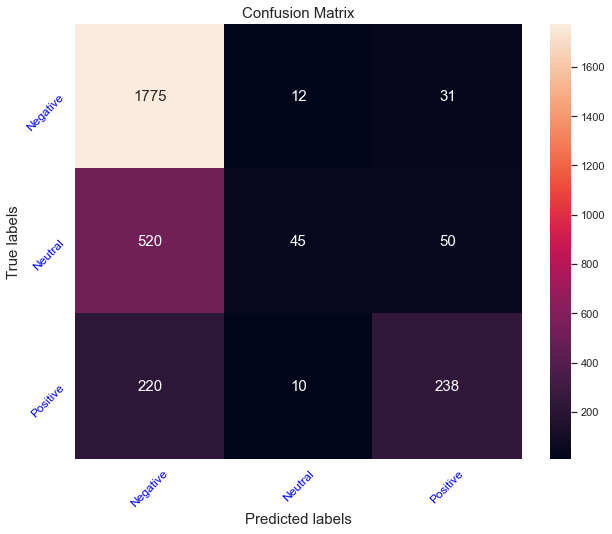

In [103]:
# Fit Random forest with count vectorizor

model_fit_evaluate(rfcl, tup_vec)

Model:  RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=7)
Training data Cross Validation Score:  0.7113426297187324
Test Score:  0.7135470527404343


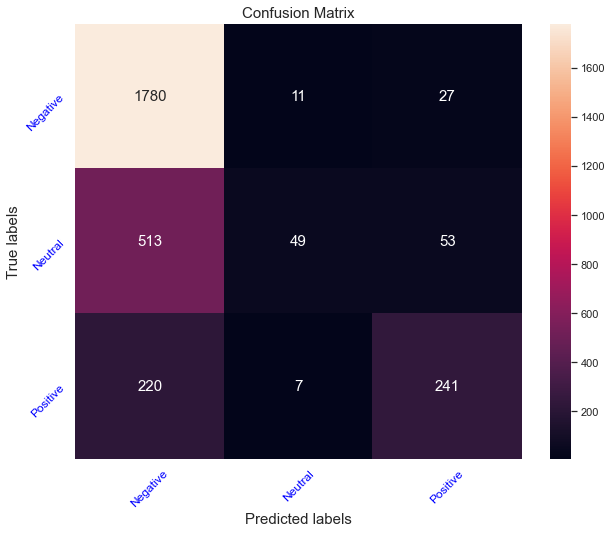

In [104]:
# Fit Random Forest with TfidfVectorizer vectorizor

model_fit_evaluate(rfcl, tup_tfidf)

Model:  GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=7)
Training data Cross Validation Score:  0.6952249844070213
Test Score:  0.6938986556359876


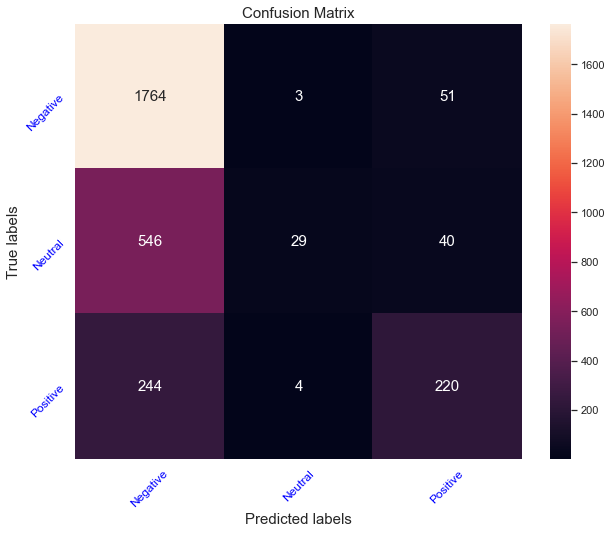

In [105]:
# Fit Gradient Boost with count vectorizor

model_fit_evaluate(gbcl, tup_vec)

Model:  GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=7)
Training data Cross Validation Score:  0.6979836050966765
Test Score:  0.6959669079627715


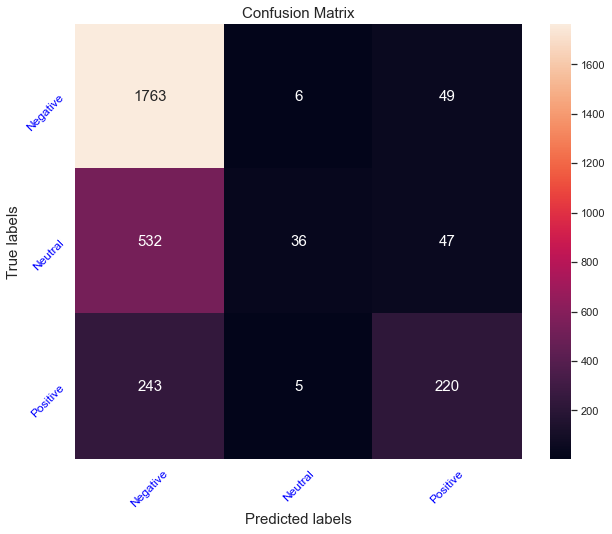

In [106]:
# Fit Gradient Boost with TfIDF vectorizor

model_fit_evaluate(gbcl, tup_tfidf)

Model:  KNeighborsClassifier(n_jobs=-1)
Training data Cross Validation Score:  0.6615238795331017
Test Score:  0.6559806963116167


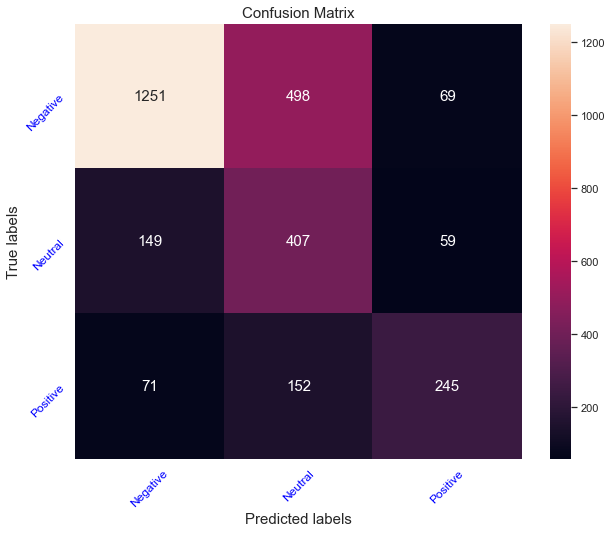

In [107]:
# Fit KNN with count vectorizor

model_fit_evaluate(kncl, tup_vec)

Model:  KNeighborsClassifier(n_jobs=-1)
Training data Cross Validation Score:  0.5566259021651965
Test Score:  0.546018614270941


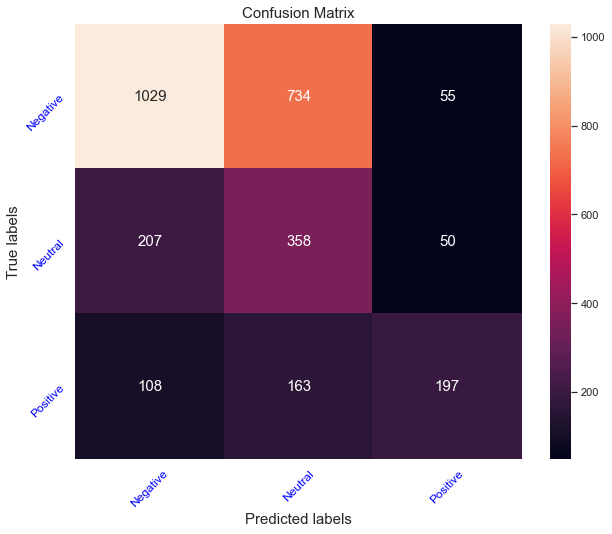

In [108]:
# Fit KNN with count vectorizor

model_fit_evaluate(kncl, tup_tfidf)

Model:  GaussianNB()
Training data Cross Validation Score:  0.4844835011434851
Test Score:  0.4722509479489831


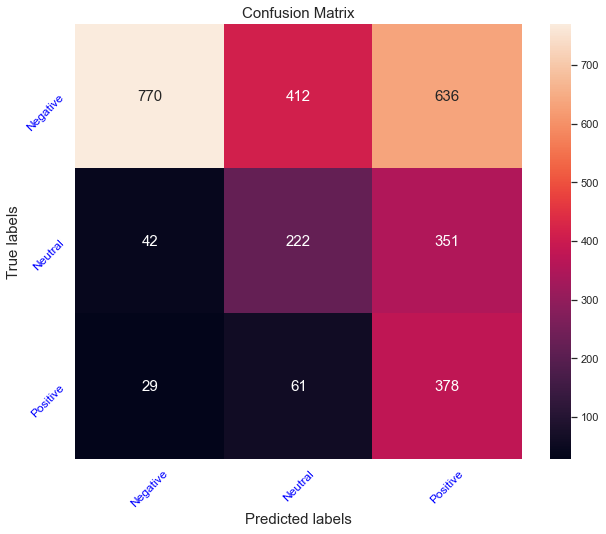

In [109]:
# Fit Native Bayes with count vectorizor

model_fit_evaluate(nbcl, tup_vec)

Model:  GaussianNB()
Training data Cross Validation Score:  0.4592288900769253
Test Score:  0.44846604619096864


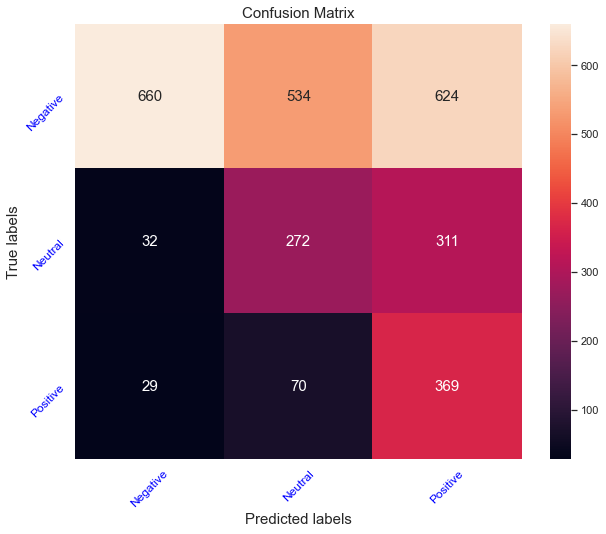

In [110]:
# Fit Native Bayes with TfIdf vectorizor

model_fit_evaluate(nbcl, tup_tfidf)

<font color='green'>**Observation:** </font>
- In Classical machine learning algorithm Random forest gives better result than other models
- Tfidf vectorizor works little better than count vectorizor.

### 5.b. Deep learning

In [113]:
# Convert labels to one hot vectors.

lbin = LabelBinarizer()

In [114]:
X_train_vec = X_train_vec.toarray()
X_train_tfidf = X_train_tfidf.toarray()
y_train = lbin.fit_transform(y_train)

X_test_vec = X_test_vec.toarray()
X_test_tfidf = X_test_tfidf.toarray()
y_test = lbin.transform(y_test)


#### <font color='sky blue'>Count Vectorizor</font>

In [158]:
# Initializing and build sequential model for Count vectorizor

model = Sequential()

model.add(Dense(16, input_shape = (500,), activation = 'relu', kernel_initializer='normal', bias_initializer='zeros'))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))

In [159]:
# initiate Adam optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

lss = 'categorical_crossentropy'

In [160]:
# Model compile

model.compile(optimizer = opt, loss = lss, metrics=['accuracy'])

In [161]:
# Model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                8016      
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 51        
Total params: 8,067
Trainable params: 8,067
Non-trainable params: 0
_________________________________________________________________


#### Training [Forward pass and Backpropagation]

In [162]:
# running with count vectorizor

history = model.fit(X_train_vec, y_train, batch_size=500, epochs = 25, verbose = 1, validation_split=.2)


Epoch 1/25
19/19 [==============================] - 1s 14ms/step - loss: 1.0581 - accuracy: 0.4944 - val_loss: 0.9661 - val_accuracy: 0.6316
Epoch 2/25
19/19 [==============================] - 0s 5ms/step - loss: 0.9403 - accuracy: 0.6150 - val_loss: 0.8565 - val_accuracy: 0.6316
Epoch 3/25
19/19 [==============================] - 0s 6ms/step - loss: 0.8380 - accuracy: 0.6294 - val_loss: 0.7904 - val_accuracy: 0.6316
Epoch 4/25
19/19 [==============================] - 0s 6ms/step - loss: 0.7863 - accuracy: 0.6260 - val_loss: 0.7554 - val_accuracy: 0.6359
Epoch 5/25
19/19 [==============================] - 0s 6ms/step - loss: 0.7460 - accuracy: 0.6345 - val_loss: 0.7287 - val_accuracy: 0.6402
Epoch 6/25
19/19 [==============================] - 0s 5ms/step - loss: 0.7117 - accuracy: 0.6513 - val_loss: 0.7058 - val_accuracy: 0.6484
Epoch 7/25
19/19 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.6641 - val_loss: 0.6856 - val_accuracy: 0.6747
Epoch 8/25
19/19 [=

In [163]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

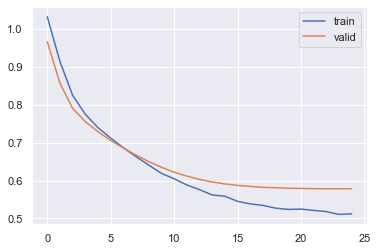

In [164]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

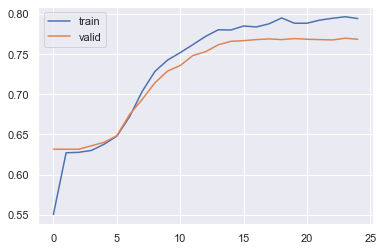

In [165]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [166]:
# Check accuracy score on test data

model.evaluate(X_test_vec,y_test)

91/91 [==============================] - 0s 711us/step - loss: 0.5722 - accuracy: 0.7615


[0.57217937707901, 0.7614615559577942]

In [176]:
#predicting target variable

y_predict = np.argmax(model.predict(X_test_vec), axis=-1)
y_test_label_code = np.argmax(y_test, axis=-1)

In [177]:
y_test_label_code[0:50]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

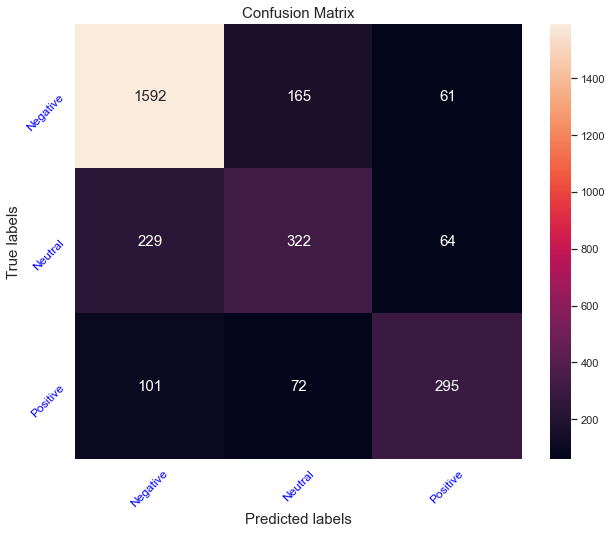

In [178]:
# confusion matrix
labels = ['Negative','Neutral','Positive']
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8));
cm= confusion_matrix(y_test_label_code,y_predict)
sns.heatmap(cm ,annot=True,ax = ax,fmt='g',annot_kws={"size": 15});
ax.set_xlabel('Predicted labels',fontsize=15);
ax.set_ylabel('True labels',fontsize=15);
ax.set_title('Confusion Matrix',fontsize=15);
ax.xaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
ax.yaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');

#### <font color='sky blue'>Tfidf Vectorizor</font>

In [179]:
# Initializing and build sequential model for Tfidf vectorizor

model = Sequential()

model.add(Dense(16, input_shape = (500,), activation = 'relu', kernel_initializer='normal', bias_initializer='zeros'))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))

In [180]:
# initiate Adam optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

lss = 'categorical_crossentropy'

In [181]:
# Model compile

model.compile(optimizer = opt, loss = lss, metrics=['accuracy'])

In [182]:
# Model summary

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                8016      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 51        
Total params: 8,067
Trainable params: 8,067
Non-trainable params: 0
_________________________________________________________________


#### Training [Forward pass and Backpropagation]

In [183]:
# running with count vectorizor

history = model.fit(X_train_tfidf, y_train, batch_size=500, epochs = 25, verbose = 1, validation_split=.2)


Epoch 1/25
19/19 [==============================] - 1s 15ms/step - loss: 1.0899 - accuracy: 0.4336 - val_loss: 1.0533 - val_accuracy: 0.6333
Epoch 2/25
19/19 [==============================] - 0s 5ms/step - loss: 1.0387 - accuracy: 0.6332 - val_loss: 1.0002 - val_accuracy: 0.6316
Epoch 3/25
19/19 [==============================] - 0s 5ms/step - loss: 0.9843 - accuracy: 0.6343 - val_loss: 0.9440 - val_accuracy: 0.6316
Epoch 4/25
19/19 [==============================] - 0s 5ms/step - loss: 0.9282 - accuracy: 0.6314 - val_loss: 0.8896 - val_accuracy: 0.6316
Epoch 5/25
19/19 [==============================] - 0s 4ms/step - loss: 0.8776 - accuracy: 0.6270 - val_loss: 0.8431 - val_accuracy: 0.6325
Epoch 6/25
19/19 [==============================] - 0s 5ms/step - loss: 0.8300 - accuracy: 0.6361 - val_loss: 0.8054 - val_accuracy: 0.6454
Epoch 7/25
19/19 [==============================] - 0s 5ms/step - loss: 0.8004 - accuracy: 0.6422 - val_loss: 0.7742 - val_accuracy: 0.6540
Epoch 8/25
19/19 [=

In [184]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

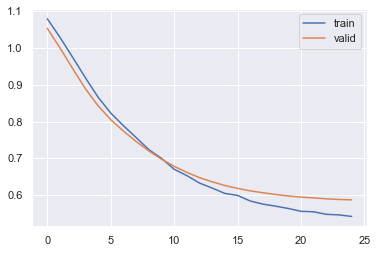

In [185]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

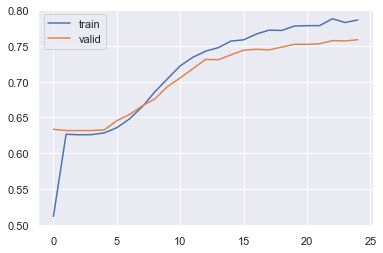

In [186]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [187]:
# Check accuracy score on test data

model.evaluate(X_test_tfidf,y_test)

91/91 [==============================] - 0s 733us/step - loss: 0.5837 - accuracy: 0.7587


[0.5837251543998718, 0.758703887462616]

In [188]:
#predicting target variable

y_predict = np.argmax(model.predict(X_test_tfidf), axis=-1)
y_test_label_code = np.argmax(y_test, axis=-1)

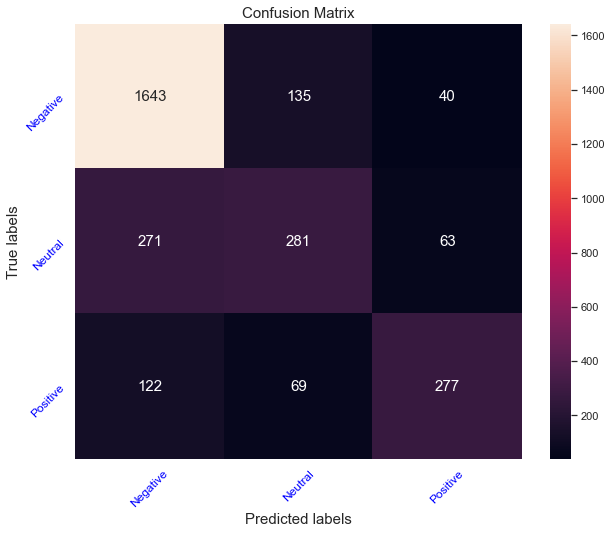

In [189]:
# confusion matrix
labels = ['Negative','Neutral','Positive']
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8));
cm= confusion_matrix(y_test_label_code,y_predict)
sns.heatmap(cm ,annot=True,ax = ax,fmt='g',annot_kws={"size": 15});
ax.set_xlabel('Predicted labels',fontsize=15);
ax.set_ylabel('True labels',fontsize=15);
ax.set_title('Confusion Matrix',fontsize=15);
ax.xaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
ax.yaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');

<font color='green'>**Observation:** </font>
- Deep learning model gives little bit improved score than conventional machine learning
- Whaere as here Count vectorizor works slighly better compared to Tfidf vectorizor

#### <font color='sky blue'>Vectorization unsing n-gram </font>

In [377]:
# Count Vectorization 


vectorizer = CountVectorizer(max_features=1500, ngram_range=(1, 2))           
X_train_vec = vectorizer.fit_transform(X_train).toarray()


X_test_vec = vectorizer.transform(X_test).toarray()

In [378]:
vectorizer.get_feature_names()[:25]

['able',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'account',
 'acct',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admiral',
 'admiral club',
 'advance',
 'advise',
 'advisory',
 'affect',
 'afternoon',
 'age',
 'agent']

In [379]:
X_train_vec.shape

(11602, 1500)

In [380]:
# TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1500,  ngram_range=(1, 2))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train).toarray()


X_test_tfidf = vectorizer_tfidf.transform(X_test).toarray()


In [381]:
vectorizer_tfidf.get_feature_names()[:25]

['able',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'account',
 'acct',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admiral',
 'admiral club',
 'advance',
 'advise',
 'advisory',
 'affect',
 'afternoon',
 'age',
 'agent']

In [382]:
X_train_tfidf.shape

(11602, 1500)

#### <font color='sky blue'>Tfidf Vectorizor</font>

In [395]:
# Initializing and build sequential model for Tfidf vectorizor

model = Sequential()

model.add(Dense(16, input_shape = (1500,), activation = 'relu', kernel_initializer='normal', bias_initializer='zeros'))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))

In [396]:
# initiate Adam optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

lss = 'categorical_crossentropy'

In [397]:
# Model compile

model.compile(optimizer = opt, loss = lss, metrics=['accuracy'])

In [398]:
# Model summary

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                24016     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 51        
Total params: 24,067
Trainable params: 24,067
Non-trainable params: 0
_________________________________________________________________


#### Training [Forward pass and Backpropagation]

In [399]:
# running with count vectorizor

history = model.fit(X_train_tfidf, y_train, batch_size=500, epochs = 25, verbose = 1, validation_split=.2)


Epoch 1/25
19/19 [==============================] - 1s 17ms/step - loss: 1.0761 - accuracy: 0.4994 - val_loss: 1.0258 - val_accuracy: 0.6333
Epoch 2/25
19/19 [==============================] - 0s 7ms/step - loss: 1.0061 - accuracy: 0.6248 - val_loss: 0.9529 - val_accuracy: 0.6316
Epoch 3/25
19/19 [==============================] - 0s 7ms/step - loss: 0.9338 - accuracy: 0.6243 - val_loss: 0.8877 - val_accuracy: 0.6316
Epoch 4/25
19/19 [==============================] - 0s 8ms/step - loss: 0.8632 - accuracy: 0.6345 - val_loss: 0.8385 - val_accuracy: 0.6325
Epoch 5/25
19/19 [==============================] - 0s 7ms/step - loss: 0.8218 - accuracy: 0.6286 - val_loss: 0.8031 - val_accuracy: 0.6364
Epoch 6/25
19/19 [==============================] - 0s 7ms/step - loss: 0.8008 - accuracy: 0.6331 - val_loss: 0.7734 - val_accuracy: 0.6532
Epoch 7/25
19/19 [==============================] - 0s 7ms/step - loss: 0.7517 - accuracy: 0.6654 - val_loss: 0.7446 - val_accuracy: 0.6678
Epoch 8/25
19/19 [=

In [400]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

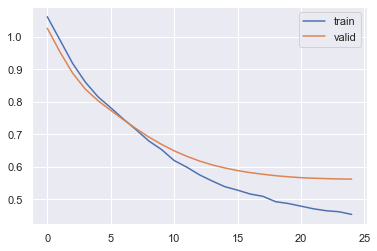

In [401]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

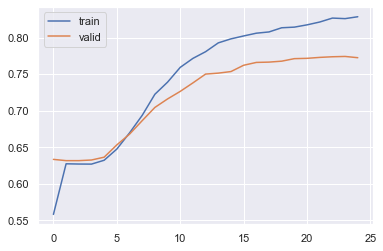

In [402]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [403]:
# Check accuracy score on test data

model.evaluate(X_test_tfidf,y_test)

91/91 [==============================] - 0s 966us/step - loss: 0.5490 - accuracy: 0.7790


[0.5489681959152222, 0.7790417075157166]

In [404]:
#predicting target variable

y_predict = np.argmax(model.predict(X_test_tfidf), axis=-1)
y_test_label_code = np.argmax(y_test, axis=-1)

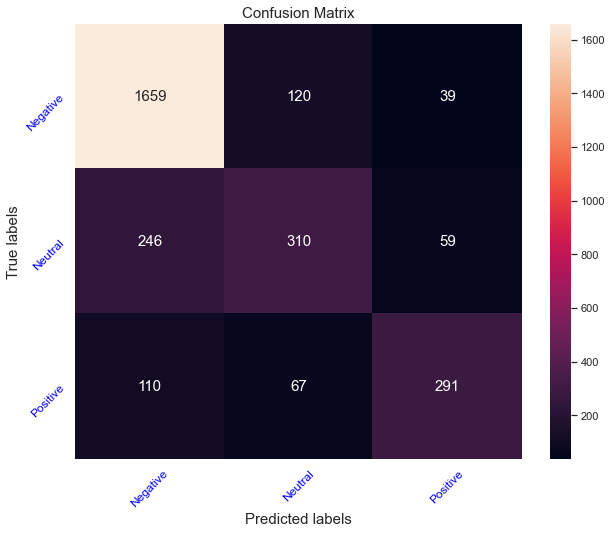

In [405]:
# confusion matrix
labels = ['Negative','Neutral','Positive']
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8));
cm= confusion_matrix(y_test_label_code,y_predict)
sns.heatmap(cm ,annot=True,ax = ax,fmt='g',annot_kws={"size": 15});
ax.set_xlabel('Predicted labels',fontsize=15);
ax.set_ylabel('True labels',fontsize=15);
ax.set_title('Confusion Matrix',fontsize=15);
ax.xaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
ax.yaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');

#### <font color='sky blue'>Count Vectorizor</font>

In [406]:
# Initializing and build sequential model for Count vectorizor

model = Sequential()

model.add(Dense(16, input_shape = (1500,), activation = 'relu', kernel_initializer='normal', bias_initializer='zeros'))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))

In [407]:
# initiate Adam optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

lss = 'categorical_crossentropy'

In [408]:
# Model compile

model.compile(optimizer = opt, loss = lss, metrics=['accuracy'])

In [409]:
# Model summary

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 16)                24016     
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 51        
Total params: 24,067
Trainable params: 24,067
Non-trainable params: 0
_________________________________________________________________


#### Training [Forward pass and Backpropagation]

In [410]:
# running with count vectorizor

history = model.fit(X_train_vec, y_train, batch_size=500, epochs = 25, verbose = 1, validation_split=.2)


Epoch 1/25
19/19 [==============================] - 1s 21ms/step - loss: 1.0576 - accuracy: 0.4618 - val_loss: 0.9457 - val_accuracy: 0.6540
Epoch 2/25
19/19 [==============================] - 0s 11ms/step - loss: 0.9199 - accuracy: 0.6410 - val_loss: 0.8390 - val_accuracy: 0.6450
Epoch 3/25
19/19 [==============================] - 0s 10ms/step - loss: 0.8239 - accuracy: 0.6542 - val_loss: 0.7732 - val_accuracy: 0.6575
Epoch 4/25
19/19 [==============================] - 0s 10ms/step - loss: 0.7594 - accuracy: 0.6664 - val_loss: 0.7322 - val_accuracy: 0.6721
Epoch 5/25
19/19 [==============================] - 0s 10ms/step - loss: 0.7237 - accuracy: 0.6837 - val_loss: 0.6988 - val_accuracy: 0.6872
Epoch 6/25
19/19 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.7104 - val_loss: 0.6688 - val_accuracy: 0.7092
Epoch 7/25
19/19 [==============================] - 0s 10ms/step - loss: 0.6440 - accuracy: 0.7421 - val_loss: 0.6431 - val_accuracy: 0.7260
Epoch 8/25
19

In [411]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

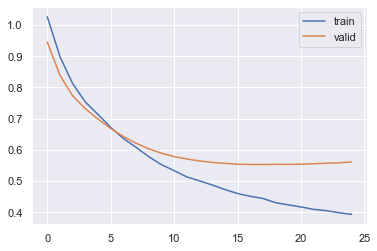

In [412]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

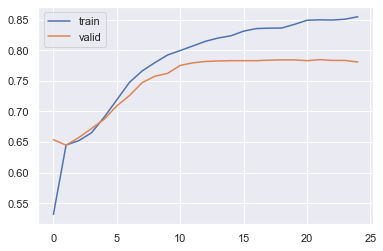

In [413]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [414]:
# Check accuracy score on test data

model.evaluate(X_test_vec,y_test)

91/91 [==============================] - 0s 866us/step - loss: 0.5454 - accuracy: 0.7804


[0.5454268455505371, 0.7804205417633057]

In [415]:
#predicting target variable

y_predict = np.argmax(model.predict(X_test_vec), axis=-1)
y_test_label_code = np.argmax(y_test, axis=-1)

In [416]:
y_test_label_code[0:50]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1], dtype=int64)

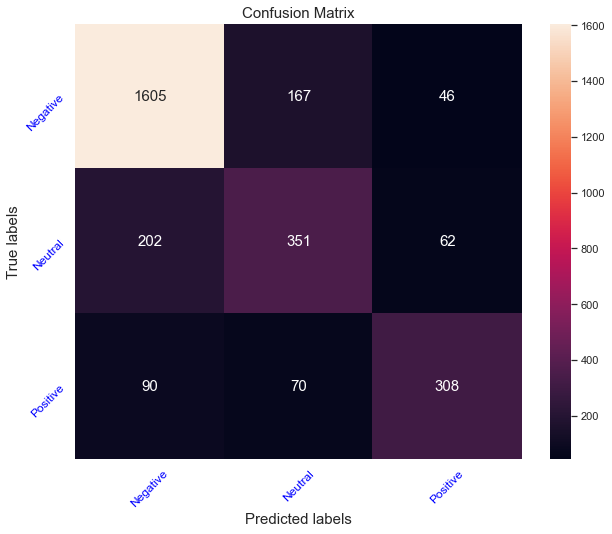

In [417]:
# confusion matrix
labels = ['Negative','Neutral','Positive']
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (10,8));
cm= confusion_matrix(y_test_label_code,y_predict)
sns.heatmap(cm ,annot=True,ax = ax,fmt='g',annot_kws={"size": 15});
ax.set_xlabel('Predicted labels',fontsize=15);
ax.set_ylabel('True labels',fontsize=15);
ax.set_title('Confusion Matrix',fontsize=15);
ax.xaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');
ax.yaxis.set_ticklabels(labels,fontsize=12,rotation = 45, color='blue');

<font color='green'>**Observation:** </font>
- N-gram improves accuracy about 2%

### 6. Summarize understanding:

#### <font color='sky blue'>Pre processing</font>
- Preprocessing helps us to get rid of unwanted words, which are not related to our problem
- Here I chose different preprocessing methods as below

- <b>Capture emoji:</b> As Emoji contains some sentiment information
- <b>Remove HTML:</b> HTML tag does not carry any information related to sentiment
- <b>Remove URL:</b> Website urls does not carry any sentiment related information
- <b>Replace contraction:</b> This helps to reduce number of unique words in our corpus
- <b>Remover twitter handle:</b> In tweets Tritter handle is very common, but that does not carry any sentiment information. So better to remove those
- <b>Remove numbers:</b> as numbers does not carry any sentiment data
- <b>Remove new line and Special charecter:</b> This will help reduce the corpus size and get rid of unwanted words or charecters
- <b>Convert to lower case:</b> Helps in minimizing the unique word set
- <b>Tokenize:</b> Helps in breaking sentences into words
- <b>Lemmatize:</b> Helps in going to root of the words, hence reducing unique word list
- <b>Remove Stop words:</b> Stop words doe not carry any information related to NLP hence removed to reduce words. But Negative sentiment related words are removed from stop word list and some common words are added to the custom stop word list.
- <b>Remove some POS tags:</b> Numbers in word (Ten, twenty etc), Proper noun, pronoun etc does not contain any sentiment related data, hence removed to reduce word counts

#### <font color='sky blue'>Vectorization</font>
- Vectorization helps us in converting corpus into word count matrix of word counts
- Count vectorizor cretes just the bag of words
- Tfidf vectorizor deprioratize the common words accorss multiple document in corpus
- In our model we see almost similar experience with count vectorizor and Tfidf vectorizor
- Whereas using bi-gram improves accuracy to some extent

#### <font color='sky blue'>Model performance</font>
- Regular machne lerning model like Random forest gives decent score of around 70% in test data
- Switching to Deep lerning simple model improve accuracy to about 75%
- But making the Deep lerning model complex makes it overfitted and reduces accuracy (though it is not in result here, but I tested changing number of nurons in layer and number of layers)
- Using deep lerning model with bi-gram helps to improve accuracy to close to 78%

#### <font color='sky blue'>Final results</font>

In [418]:
df_result = pd.DataFrame()
df_result['y_test'] = y_test_label_code
df_result['y_pred'] = y_predict

df_result

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2896,1,0
2897,0,0
2898,0,0
2899,1,1


In [428]:
# Overall Accuracy

accuracy_score(y_test_label_code, y_predict)

0.7804205446397794

In [436]:
# Class Level metrices

print(classification_report(y_test_label_code, y_predict, target_names=labels, digits=4))

              precision    recall  f1-score   support

    Negative     0.8461    0.8828    0.8641      1818
     Neutral     0.5969    0.5707    0.5835       615
    Positive     0.7404    0.6581    0.6968       468

    accuracy                         0.7804      2901
   macro avg     0.7278    0.7039    0.7148      2901
weighted avg     0.7762    0.7804    0.7776      2901



In [439]:
# Class level accuracy

df_accuracy = pd.DataFrame()
df_accuracy['labels'] = labels
df_accuracy['score'] = cm.diagonal()/cm.sum(axis=1)

df_accuracy

,labels,score
0,Negative,0.882838
1,Neutral,0.570732
2,Positive,0.658120
